#Consigna:

1. Cargar este archivo: https://drive.google.com/file/d/1Msf9fKLNyQJFmZbPecSe1G23kjkPg-ap/view en Python. Realizar estadísticas descriptivas básicas
2.	Realizar un histograma con los salarios. Qué rango(s) de salarios son los más populares?
3.	Realizar un gráfico de violín con los salarios, discriminados por género. 
4.	Graficar la serie de tiempo correspondiente a la fecha de contratación (DateofHire)


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df_hr = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science - Coder/Archivos csv/HRDataset_v14.csv')
df_hr.head(1)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.6,5,0,1/17/2019,0,1


In [ ]:
#1. Cargar el archivo HRDataset_v14.csv en Python. Realizar estadísticas descriptivas básicas

df_hr.describe(include='all')

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
count,311,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,...,311,303.000000,311,311,311.000000,311.000000,311.000000,311,311.000000,311.000000
unique,311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21,NaN,9,4,NaN,NaN,NaN,137,NaN,NaN
top,"Adinolfi, Wilson K",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Michael Albert,NaN,Indeed,Fully Meets,NaN,NaN,NaN,1/14/2019,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22,NaN,87,243,NaN,NaN,NaN,18,NaN,NaN
mean,NaN,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,...,NaN,14.570957,NaN,NaN,4.110000,3.890675,1.218650,NaN,0.414791,10.237942
std,NaN,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,...,NaN,8.078306,NaN,NaN,0.789938,0.909241,2.349421,NaN,1.294519,5.852596
min,NaN,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,...,NaN,1.000000,NaN,NaN,1.120000,1.000000,0.000000,NaN,0.000000,1.000000
25%,NaN,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,...,NaN,10.000000,NaN,NaN,3.690000,3.000000,0.000000,NaN,0.000000,5.000000
50%,NaN,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,...,NaN,15.000000,NaN,NaN,4.280000,4.000000,0.000000,NaN,0.000000,10.000000
75%,NaN,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,...,NaN,19.000000,NaN,NaN,4.700000,5.000000,0.000000,NaN,0.000000,15.000000


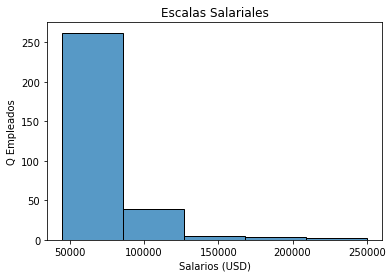

In [ ]:
#2. Realizar un histograma con los salarios. Qué rango(s) de salarios son los más populares?

import seaborn as sns
ax = sns.histplot(data=df_hr, x='Salary', bins=5)

ax.set(xlabel='Salarios (USD)', ylabel='Q Empleados', title='Escalas Salariales');



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


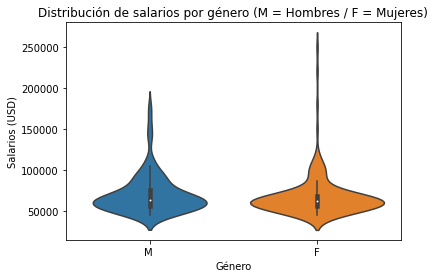

In [ ]:
#3. Realizar un gráfico de violín con los salarios, discriminados por género.

x = df_hr['Sex']
y = df_hr['Salary']

ax = sns.violinplot(x, y) 

ax.set(xlabel='Género', ylabel='Salarios (USD)', title='Distribución de salarios por género (M = Hombres / F = Mujeres)');


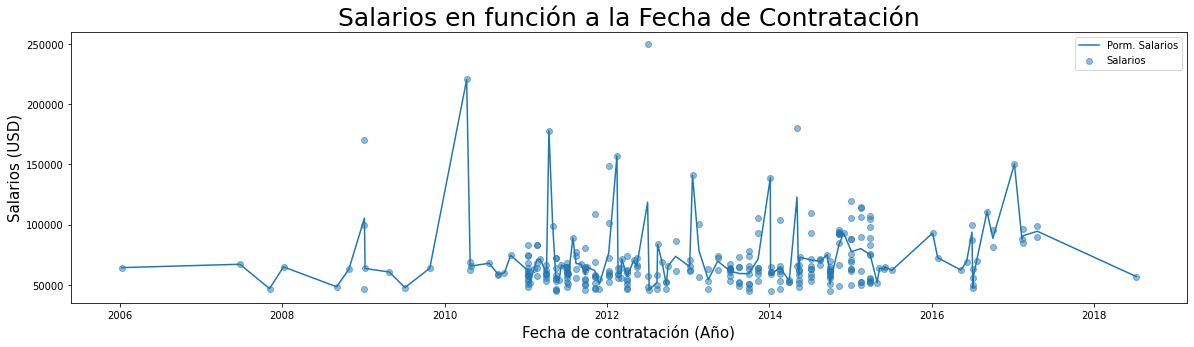

In [ ]:
#4. Graficar la serie de tiempo correspondiente a la fecha de contratación (DateofHire)

df_hr['Año'] = pd.to_datetime(df_hr['DateofHire'])

fig, ax = plt.subplots(figsize=(20, 5))

x = df_hr['Año']
y = df_hr['Salary']
z = df_hr.groupby('Año')['Salary'].mean()

ax.scatter(x, y, alpha=0.5,label='Salarios')
ax.plot(z,label='Porm. Salarios')

ax.set_title('Salarios en función a la Fecha de Contratación',size=25)
ax.set_xlabel('Fecha de contratación (Año)', size=15)
ax.set_ylabel('Salarios (USD)',size=15)
ax.legend();
